# **Regarding the Dataset**
The dataset contains transactions made by credit cards by European cardholders.

This dataset presents transactions that occurred in two days, where we have **492 frauds out of 284,807 transactions**. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.




### Introduction
We will use predictive models to see how accurate they are in detecting whether a transaction is a normal payment or a fraud. As described in the dataset, the features are scaled and the names of the features are not shown due to privacy reasons. Nevertheless, we can still analyze some important aspects of the dataset

**AIM**


*   Understand the little distribution of the "little" data that was provided to us.
*   Create a 50/50 sub-dataframe ratio of "Fraud" and "Non-Fraud" transactions

*   Determine the Classifiers we are going to use and decide which one has a higher accuracy






In [ ]:
#Import all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
pip install imbalanced-learn

     ------------------------------------ 225.4/225.4 kB 982.3 kB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Load the data to pandas Dataframe
credit_data = pd.read_csv('creditcard.csv')

In [ ]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Information
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#Check for null values in columns
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Check distribution of legit and fraudulent transaction [legit=0. Fraudulent =1]
credit_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='Amount'>

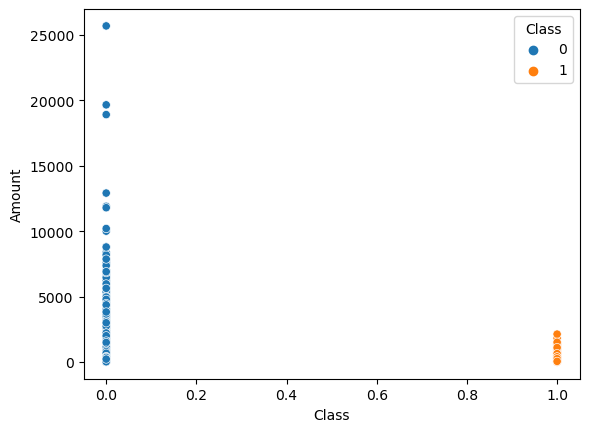

In [ ]:
sns.scatterplot(x='Class', y='Amount', data=credit_data, hue='Class')

### **NOTE:**
By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented.

***This data set is highly unbalanced.***

*   0 Represents Legit Transactions
*   1 Represents Fraud Transactions



In [ ]:
# Separating the data for analysis
legit = credit_data[credit_data.Class==0]
fraud = credit_data[credit_data.Class==1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
#Compare the values of both the transactions
credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### Undersampling
##### Build a sample dataset from original containing similar distrubution of legit and fraudulent transactions
In this phase of the project we will implement Under Sampling which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.
##### Number of fraud transactions is 492

**NOTE:**

The main issue with Under-Sampling is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss

In [ ]:
legit_sample = legit.sample(n=492)

### Concatnate the two dataframes 

In [ ]:
df = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
245231,152657.0,-1.253285,-0.144553,0.827034,-1.068843,1.125701,-0.217599,0.773114,-0.019735,0.790356,...,0.263198,1.193921,-0.048873,0.554438,0.813305,-0.135395,0.049103,0.090436,33.80,0
180068,124362.0,0.088873,0.982903,-0.332166,-0.637170,0.939958,-0.501748,0.853777,0.056575,-0.310902,...,-0.277434,-0.679373,0.101874,0.600309,-0.484252,0.092501,0.222123,0.074667,1.78,0
223153,143266.0,-0.089616,0.431559,0.955739,-0.657907,0.472085,-0.051037,0.529771,-0.248989,0.724258,...,-0.145463,-0.162437,0.209309,0.583241,-0.603173,-0.771057,-0.330035,-0.195751,12.99,0
203641,134901.0,1.543755,-1.785569,0.171220,-0.427366,-1.611070,0.728810,-1.403413,0.453045,2.499307,...,0.284167,0.746918,0.068279,0.789708,-0.574000,0.680535,-0.021054,-0.011014,199.04,0
96034,65578.0,-3.448126,2.687171,0.140494,0.219236,-0.750284,-0.998469,0.884652,-0.404759,0.862840,...,0.134648,0.240507,-0.152532,0.664727,-0.079935,-0.783824,-3.474571,-1.324015,43.59,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 245231 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64

In [ ]:
df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,99728.800813,-0.116988,0.019525,-0.125540,-0.117710,-0.056698,0.056117,0.180032,0.029960,0.112015,...,-0.021599,-0.037390,-0.027096,-0.014087,0.054989,0.006021,-0.006769,0.017446,0.009778,103.310508
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Spliting the data into features and Target

In [ ]:
X = df.drop('Class', axis = 1)
Y = df['Class']

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
245231  152657.0 -1.253285 -0.144553  0.827034 -1.068843  1.125701 -0.217599   
180068  124362.0  0.088873  0.982903 -0.332166 -0.637170  0.939958 -0.501748   
223153  143266.0 -0.089616  0.431559  0.955739 -0.657907  0.472085 -0.051037   
203641  134901.0  1.543755 -1.785569  0.171220 -0.427366 -1.611070  0.728810   
96034    65578.0 -3.448126  2.687171  0.140494  0.219236 -0.750284 -0.998469   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

### Split the data into Train and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


### Model Training
#### With Logistic Regression

In [ ]:
model = LogisticRegression()

##### Train the LR model with Train data


In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

### Model Evaluation

#### Accuracy Score

In [ ]:
# Accuracy on training data

XTrain_predict = model.predict(X_train)
training_data_accuracy = accuracy_score(XTrain_predict, Y_train)

In [ ]:
print('Accuracy on Training Data:', training_data_accuracy)

Accuracy on Training Data: 0.9466327827191868


In [ ]:
# Accuracy on Test data

XTest_predict = model.predict(X_test)
training_data_accuracy = accuracy_score(XTest_predict, Y_test)

In [ ]:
print('Accuracy on Testing Data:', training_data_accuracy)

Accuracy on Testing Data: 0.9390862944162437


#### USING SMOTE FOR BALANCING THE DATASET 

SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".

In [ ]:
# spliting the dataset into two
x1=credit_data.drop('Class',axis=1)
y1=credit_data["Class"]
y1.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x1, y1, test_size=0.2, random_state=4,stratify=y1)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote= SMOTE(sampling_strategy= 'not majority')
xsmote,ysmote=smote.fit_resample(x_train,y_train)

In [ ]:
#checking if its balanced
ysmote.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

C:\Users\User13\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

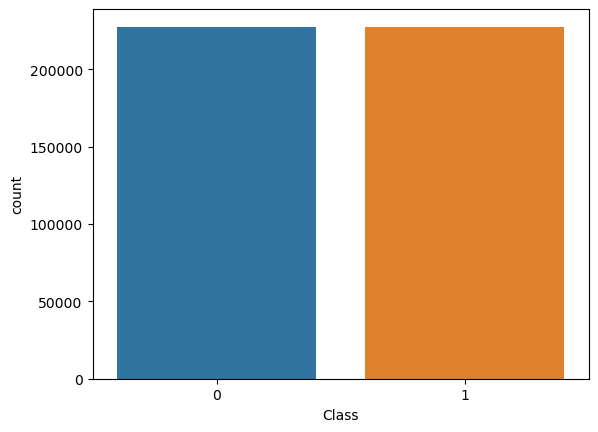

In [ ]:
#Visualisation to accurately see balance
sns.countplot(ysmote)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xsmote, ysmote, test_size=0.2, random_state=4,stratify=ysmote)

In [ ]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

C:\Users\User13\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_predict = LR.predict(x_test)

In [ ]:
Y_predict

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [ ]:
test_data_accuracy=accuracy_score(Y_predict,y_test)

In [ ]:
print('Accuracy of test data:',test_data_accuracy)

Accuracy of test data: 0.9751596487178642


In [ ]:
from sklearn.metrics import  classification_report
print('Classification report:\n',classification_report(y_test,Y_predict))
print('f1 score:',f1_score(y_test,Y_predict))

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     45491
           1       0.98      0.97      0.97     45490

    accuracy                           0.98     90981
   macro avg       0.98      0.98      0.98     90981
weighted avg       0.98      0.98      0.98     90981

f1 score: 0.9749423452190882
